
#Append

In [73]:
import pandas as pd
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(["a","b","c","d","e","f"])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


#Concat

In [74]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df2,df1])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df2,df1], axis=1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df2,df1], axis=0, keys=['df2','df1'])
print("Multiindex - concat:\n", multiindex_concat)

Row-wise - concat:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    b  a  a  b
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        b  a
df2 0  1  3
    1  2  4
df1 0  3  1
    1  4  2


#Merge - Part 1


In [75]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left=df2, right=df1, how='left', left_on='key', right_on='key')
print('Merge - Left:\n', merge_df_left)
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left=df2, right=df1, how='right', left_on='key', right_on='key')
print('Merge - Right:\n', merge_df_right)
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df2, right=df1, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df2,right=df1, how='outer', left_on='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Left:
    key  val3  val4   val1   val2
0   k1     1     6  200.0   30.0
1   k3     2     7    0.0  100.0
2   k5     3     8  100.0   10.0
3   k7     4     8    NaN    NaN
4  k10     5    10    NaN    NaN
Merge - Right:
   key  val3  val4  val1  val2
0  k1   1.0   6.0   200    30
1  k2   NaN   NaN   500    50
2  k3   2.0   7.0     0   100
3  k4   NaN   NaN   500    20
4  k5   3.0   8.0   100    10
Merge - Inner:
   key  val3  val4  val1  val2
0  k1     1     6   200    30
1  k3     2     7     0   100
2  k5     3     8   100    10
Merge - Outer:
    key  val3  val4   val1   val2
0   k1   1.0   6.0  200.0   30.0
1   k3   2.0   7.0    0.0  100.0
2   k5   3.0   8.0  100.0   10.0
3   k7   4.0   8.0    NaN    NaN
4  k10   5.0  10.0    NaN    NaN
5   k2   NaN   NaN  500.0   50.0
6   k4   NaN   NaN  500.0   20.0


#Merge - Part 2


In [76]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key','val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key','val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(),df2.reset_index())
print('Merging dataframe:\n', df_merge)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10
Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


#Join

In [77]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


#Dataset

In [78]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


#Pivot

In [79]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting with single column measurement
pivot1 = data.pivot(index='murid',columns='pelajaran',values='nilai')
print('Pivoting with single column measurement:\n', pivot1)
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid',columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60
Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


#Pivot_table

In [80]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


#Melt - Part 1


In [81]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe:
   pelajaran    value
0     kelas        A
1     kelas        B
2   english  68.3333
3   english       55
4      math       70
5      math       85
Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


#Melt - Part 2


In [82]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english','math'], var_name='pelajaran', value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0
Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0
Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran      nilai
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


#Stack & Unstack - Part 1


In [83]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas','murid','pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45
Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85

#Stack & Unstack - Part 2


In [84]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0
Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0
Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
  

#Review Inspeksi Data


In [85]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Lima data teratas:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 2   country                 4000 non-null   object 
 3   pollutant               4000 non-null   object 
 4   value                   4000 non-null   float64
 5   timestamp               4000 non-null   object 
 6   unit                    4000 non-null   obj

#Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 1


In [86]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Rata-rata pollutant (5 teratas):
           value                         ...                                 
pollutant    bc          co        no2  ...       pm10       pm25        so2
country                                 ...                                 
AR          0.0    0.000000   0.000000  ...   0.000000  18.100000   0.000000
AU          0.0    0.000000   0.000000  ...   0.000000   3.900000   0.000000
BA          0.0  475.833333  19.500000  

#Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 2


In [87]:
import pandas as pd
# Load data 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.0

#Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 3


In [3]:
import pandas as pd
# Load data 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL

#Groupby dengan Multiple Aggregations


In [4]:
import pandas as pd
# Load data 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min','median','mean','max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Multiple aggregations (5 teratas):
         value                        ...                                     
           bc                    co  ...  pm25  so2                          
          min median mean  max  min  ...   max  min median       mean     max
country                              ...                                     
AR        0.0    0.0  0.0  0.0  0.0  ...  18.1  0.0    0.0   0.000000   0.000
AU        0.0    0.0  0.0  0.0  0

#Groupby dengan Custom Aggregations


In [5]:
import pandas as pd
# Load data 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc      co       no2        o3  pm10      pm25   so2
country                                                        
AR        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA        0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA        0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


#Groupby dengan Custom Aggregations by dict


In [6]:
import pandas as pd
# Load data 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25': iqr,
   'so2': iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0

Cetak 5 data teratas custom_agg_dict:
          pm10      pm25   so2
country                      
AR        0.0  0.000000   0.0
AU        0.0  0.000000   0.0
BA       23.0  0.000000  17.0
CA        0.0  3.876471   0.0
CL        0.0  0.000000   0.0


#Load Dataset as Time Series


In [29]:
import pandas as pd
# Load dataset 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]
info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2017-01-18 16:00:00+00:00 to 2017-01-08 08:00:00+00:00
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   obje

#Convert to Datetime


In [34]:
import pandas as pd
# Load dataset 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]
Sesudah diubah dalam format datetime:
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25

#Downsampling Data


In [ ]:
import pandas as pd
# Load dataset 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('w').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quaterly dan kita hitung minimumnya untuk tiap quarter
gaq_quaterly = gaq.resample('q').min()
print('Downsampling daily to quaterly - min (5 teratas):\n', gaq_quaterly.head())

#Upsampling Data


In [47]:
import pandas as pd
# Load dataset 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Dataset sebelum di-upsampling (5 teratas):
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]
Upsampling daily to hourly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 03:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-13 04:00:00+00:00    NaN       NaN

#Resampling by Frequency


In [53]:
import pandas as pd
# Load dataset
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2m').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Dataset sebelum di-resampling (5 teratas):
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]
Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.

#Visualisasi


Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


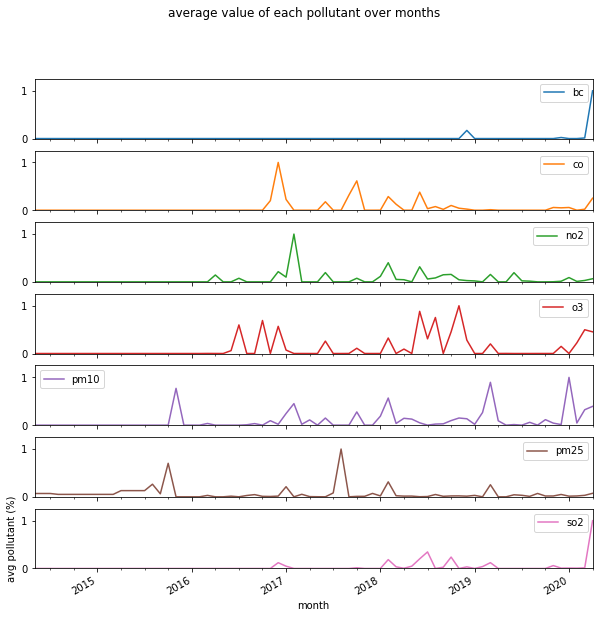

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant','value']].reset_index().set_index(['timestamp','pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

#Performa Penjualan di Setiap Cabang - Part 1


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1,retail_data2,retail_data3,retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

PENGECEKAN DATA


   order_id order_date  customer_id  ... quantity item_price total_price
0   1612885   01-01-19        16293  ...        6     747000     4482000
1   1612387   01-01-19        17228  ...        4     590000     2360000
2   1612903   01-01-19        16775  ...        3    1325000     3975000
3   1612963   01-01-19            0  ...        1    1045000     1045000
4   1612915   01-01-19            0  ...        1    -891000      891000

[5 rows x 10 columns]
Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data2: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data3: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'

#Performa Penjualan di setiap Cabang - Part 2


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
    order_id order_date  customer_id  ... quantity item_price total_price
4   1612915   01-01-19            0  ...        1    -891000      891000
96  1612927   01-01-19            0  ...        1    -891000     -891000
21  1697299   01-10-19        17841  ...        1     520000     -520000

[3 rows x 10 columns]

order_id yang bernilai undefined:
     order_id order_date  customer_id  ... quantity item_price total_price
9  undefined   01-07-19        15150  ...       12     159000     1908000

[1 rows x 10 columns]

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50852 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     50852 non-null  int64         
 1   order_date   50852 non-null  datetime64[ns]
 2   customer_id  50852 non-null  int64         
 3   city         50852 non-null  object        
 4   prov

#Performa Penjualan di setiap Cabang - Part 3


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['Jawa Timur' 'Jawa Barat' 'Jawa Tengah' 'Yogyakarta' 'DKI Jakarta']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
2019-01-02 DKI Jakarta     10        10       28     14   149577000
           Jawa Barat       7         7       26     11   172395000
           Jawa Tengah      1         1        2      2    13760000
           Jawa Timur       2         2        3      2    92570000
           Yogyakarta       1         1        6      4   122160000

unstack_city_province (5 dat

#Performa Penjualan di setiap Cabang - Part 4


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         21.0         6.0          3.0         3.0         4.0
2019-01-02         10.0         7.0          1.0         2.0         1.0
2019-01-03          9.0         2.0          8.0         4.0         3.0
2019-01-04         18.0         5.0          5.0         0.0         4.0
2019-01-05         13.0         7.0          2.0         2.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    14.052632    5.684211     2.631579    2.210526    3.052632
2019-02-28    17.043478    5.956522     2.043478    2.652174    3.130435
2019-03-31    18.259259    5.296296     2.555556    2.777778    2.703704
2019-04-30    18.269231    6.653846     3.153846    2

#Performa Penjualan di setiap Cabang - Part 5


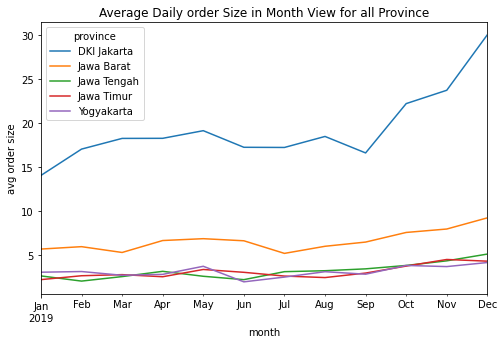

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
by_order_monthly_mean = by_order.resample('M').mean()

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

#Performa Penjualan di setiap Cabang - Part 6


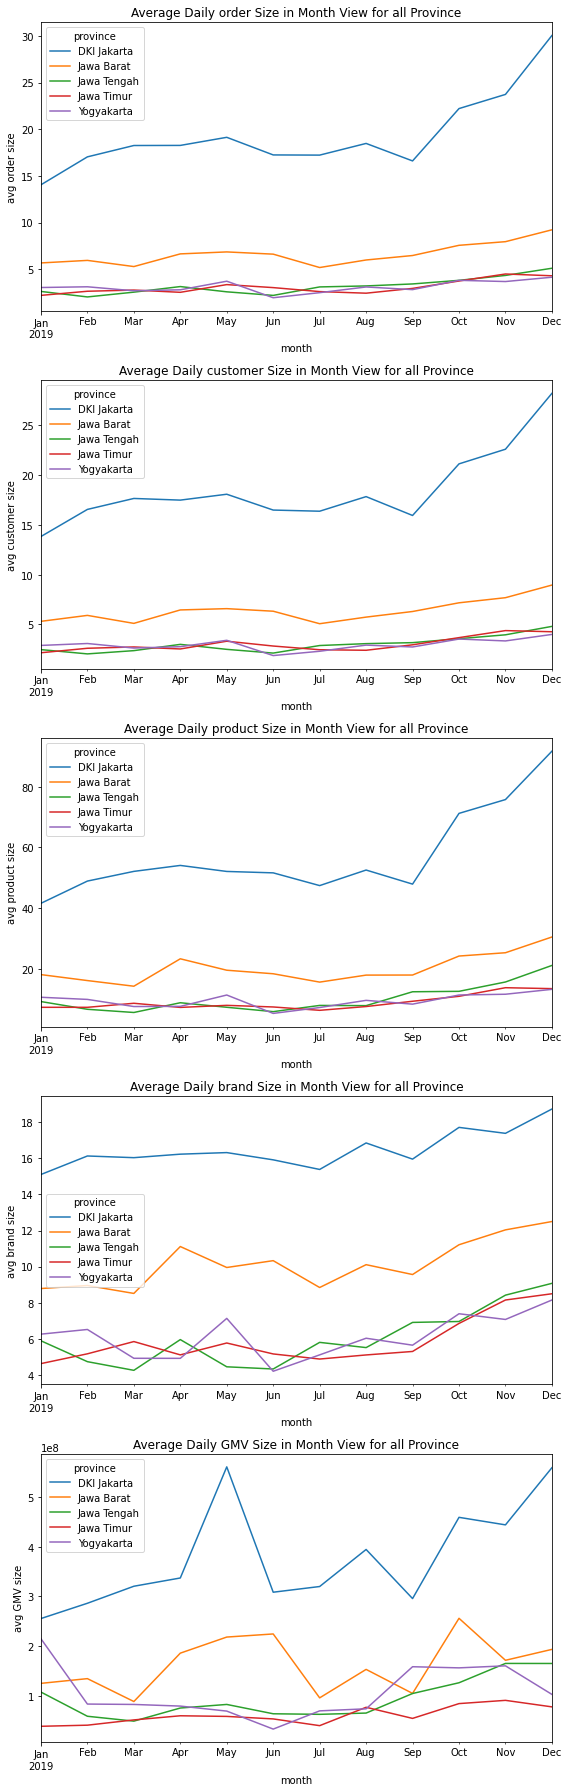

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()